In [77]:
import pandas as pd
df = pd.read_csv('titanic.csv')
import matplotlib.pyplot as plt


In [79]:
print(df.info())        
print(df.isnull().sum())   


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int6

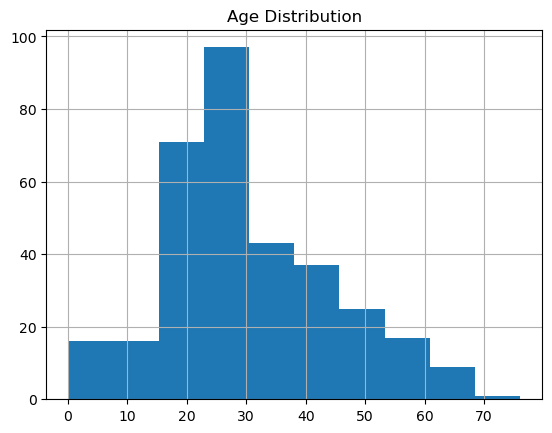

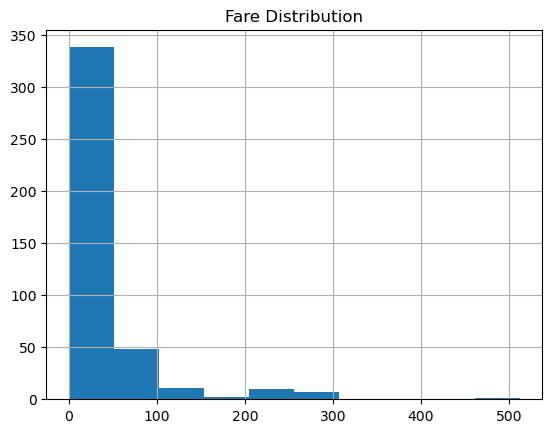

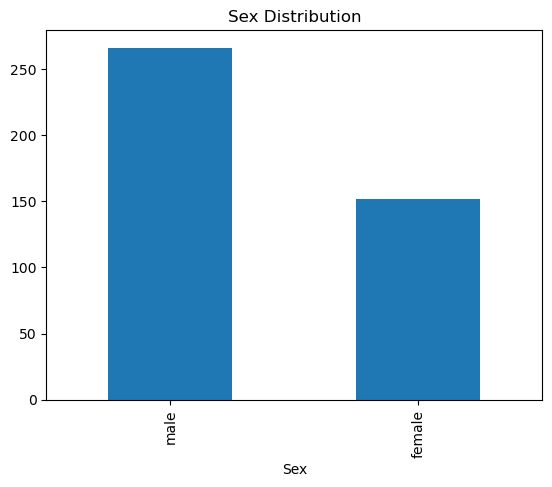

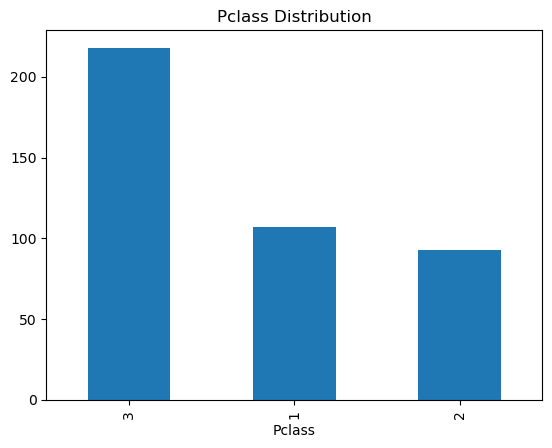

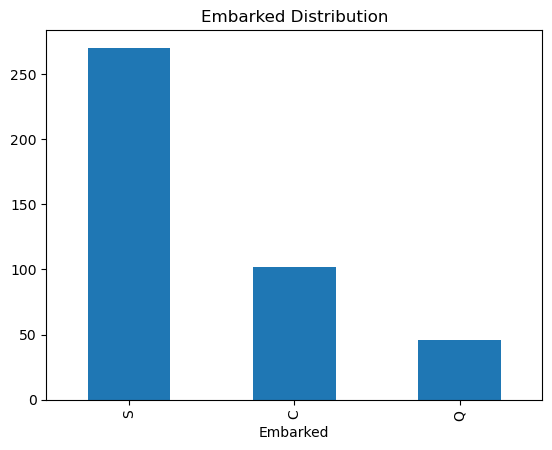

In [81]:
import matplotlib.pyplot as plt

df['Age'].hist(); plt.title('Age Distribution'); plt.show()
df['Fare'].hist(); plt.title('Fare Distribution'); plt.show()
df['Sex'].value_counts().plot(kind='bar'); plt.title('Sex Distribution'); plt.show()
df['Pclass'].value_counts().plot(kind='bar'); plt.title('Pclass Distribution'); plt.show()
df['Embarked'].value_counts().plot(kind='bar'); plt.title('Embarked Distribution'); plt.show()


In [83]:
print(df.groupby('Sex')['Survived'].mean())
print(df.groupby('Pclass')['Survived'].mean())
print(df.groupby('Embarked')['Survived'].mean())


Sex
female    1.0
male      0.0
Name: Survived, dtype: float64
Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64
Embarked
C    0.392157
Q    0.521739
S    0.325926
Name: Survived, dtype: float64


In [85]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [87]:
#Feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [47]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print(df[['SibSp', 'Parch', 'FamilySize']].head())  # Shows first 5 rows for verification


   SibSp  Parch  FamilySize
0      0      0           1
1      1      0           2
2      0      0           1
3      0      0           1
4      1      1           3


In [89]:
def get_title(name):
    import re
    match = re.search(r'([A-Za-z]+)\.', name)
    return match.group(1) if match else ''
df['Title'] = df['Name'].apply(get_title)
print(df[['Name', 'Title']].head())

                                           Name Title
0                              Kelly, Mr. James    Mr
1              Wilkes, Mrs. James (Ellen Needs)   Mrs
2                     Myles, Mr. Thomas Francis    Mr
3                              Wirz, Mr. Albert    Mr
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   Mrs


In [91]:
# drop unnecessary columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [93]:
# One-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)
print(df.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  FamilySize  Sex_male  \
0         0       3  34.5      0      0   7.8292           1      True   
1         1       3  47.0      1      0   7.0000           2     False   
2         0       2  62.0      0      0   9.6875           1      True   
3         0       3  27.0      0      0   8.6625           1      True   
4         1       3  22.0      1      1  12.2875           3     False   

   Embarked_Q  Embarked_S  Title_Dona  Title_Dr  Title_Master  Title_Miss  \
0        True       False       False     False         False       False   
1       False        True       False     False         False       False   
2        True       False       False     False         False       False   
3       False        True       False     False         False       False   
4       False        True       False     False         False       False   

   Title_Mr  Title_Mrs  Title_Ms  Title_Rev  
0      True      False     False      False  


In [95]:
# Now, split for machine learning
from sklearn.model_selection import train_test_split
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [97]:
print(X_train.info())
print(X_train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 336 to 102
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        334 non-null    int64  
 1   Age           334 non-null    float64
 2   SibSp         334 non-null    int64  
 3   Parch         334 non-null    int64  
 4   Fare          334 non-null    float64
 5   FamilySize    334 non-null    int64  
 6   Sex_male      334 non-null    bool   
 7   Embarked_Q    334 non-null    bool   
 8   Embarked_S    334 non-null    bool   
 9   Title_Dona    334 non-null    bool   
 10  Title_Dr      334 non-null    bool   
 11  Title_Master  334 non-null    bool   
 12  Title_Miss    334 non-null    bool   
 13  Title_Mr      334 non-null    bool   
 14  Title_Mrs     334 non-null    bool   
 15  Title_Ms      334 non-null    bool   
 16  Title_Rev     334 non-null    bool   
dtypes: bool(11), float64(2), int64(4)
memory usage: 21.9 KB
None
Pclass         